In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

from borfr import BO_RFR, fps
import warnings
warnings.filterwarnings("ignore")

grid = np.load('kmc_data/grid.npy')
ref_labels = np.load('kmc_data/labels.npy')
vals = np.load('kmc_data/rates.npy')

In [2]:
def f(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return vals[ind]

def get_label(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return ref_labels[ind]

x = y = np.linspace(-1,1,50)
mesh = np.meshgrid(x,y)
xy = np.vstack([m.ravel() for m in mesh]).T

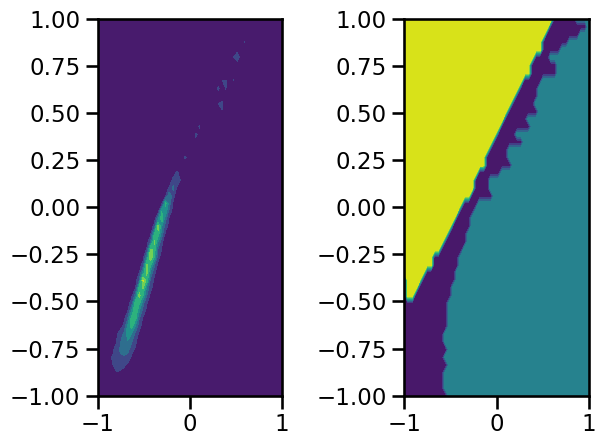

In [3]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
ax1.contourf(*mesh, np.array([f(xi) for xi in grid]).reshape(mesh[0].shape))
ax2.contourf(*mesh, np.array([get_label(xi) for xi in grid]).reshape(mesh[0].shape))
plt.tight_layout()

In [53]:
X_init = fps(grid,4)
y_init = np.array([f(xi) for xi in X_init])

x_test = fps(grid,100)

In [54]:
bor = BO_RFR(X_init, y_init, grid, f, x_test, gl = get_label, cl_weight=0.3, est_labels='known', N_batch=8)

bor.run(25)

generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 50766.21it/s]

running iterative exploration:



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:06<00:00,  3.84it/s]


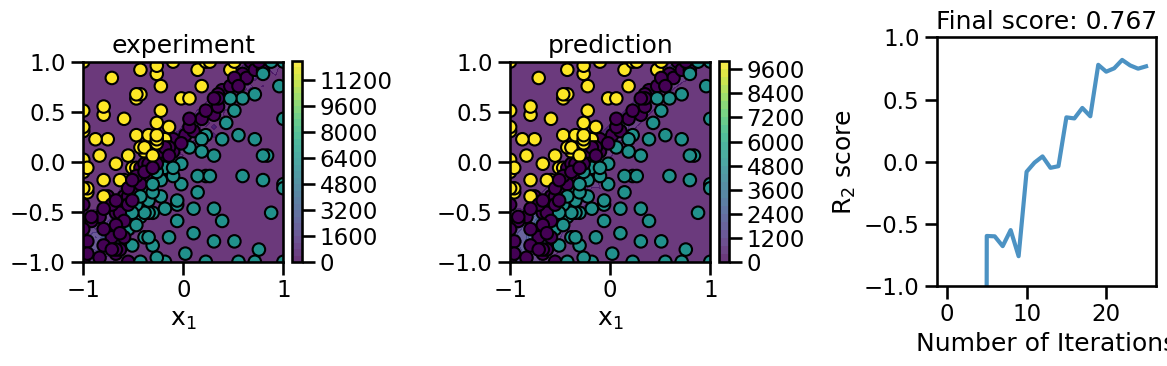

In [55]:
fig,axes = plt.subplots(ncols=3, figsize=(12,4))
ax = axes[0]
a = ax.contourf(*mesh, vals.reshape(mesh[0].shape), levels=30, alpha=0.8)
plt.colorbar(a,fraction=0.046, pad=0.04)
ax.scatter(*bor.X.T, ec='k',c=bor.labels)
ax.set_aspect('equal')
ax.set_xlabel('x$_0$')
ax.set_xlabel('x$_1$')
ax.set_title('experiment')
ax = axes[1]
a = ax.contourf(*mesh, bor.model.predict(grid).reshape(mesh[0].shape), levels=30, alpha=0.8)
plt.colorbar(a,fraction=0.046, pad=0.04)
ax.scatter(*bor.X.T, ec='k',c=bor.labels)
ax.set_aspect('equal')
ax.set_xlabel('x$_0$')
ax.set_xlabel('x$_1$')
ax.set_title('prediction')
ax = axes[2]
ax.plot(np.arange(bor.n_iters+1),bor.scores,lw=3,alpha=0.8,)
ax.set_title('Final score: %.3f'%bor.scores[-1])
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('R$_2$ score')
ax.set_ylim(-1,1)
plt.tight_layout()

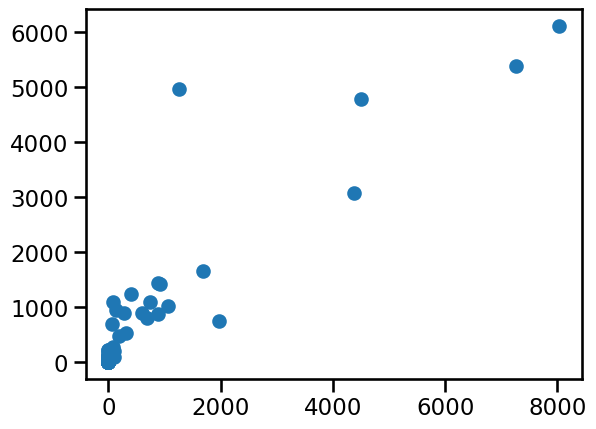

In [56]:
fig,ax = plt.subplots()
ax.scatter(np.array([f(xi) for xi in x_test]), bor.model.predict(x_test))

In [57]:
from treeple import PatchObliqueRandomForestRegressor, ObliqueRandomForestRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
pred = PatchObliqueRandomForestRegressor().fit(bor.X,bor.y).predict(x_test)
print(r2_score(pred, np.array([f(xi) for xi in x_test])))
pred = ObliqueRandomForestRegressor().fit(bor.X,bor.y).predict(x_test)
print(r2_score(pred, np.array([f(xi) for xi in x_test])))
pred = RandomForestRegressor().fit(bor.X,bor.y).predict(x_test)
print(r2_score(pred, np.array([f(xi) for xi in x_test])))

0.3267905663695698
0.7665086577826149
0.5891646202686199
